# Harris corner detection using OpenCV

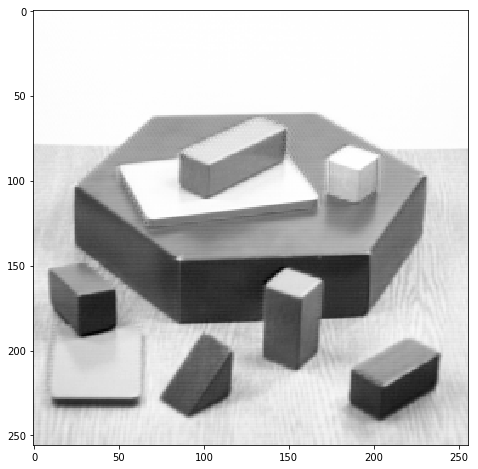

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

img = plt.imread('blocks.gif')[:,:,0]

plt.figure(figsize=[8,8])
plt.imshow(img, 'gray')




### Get cornerness image

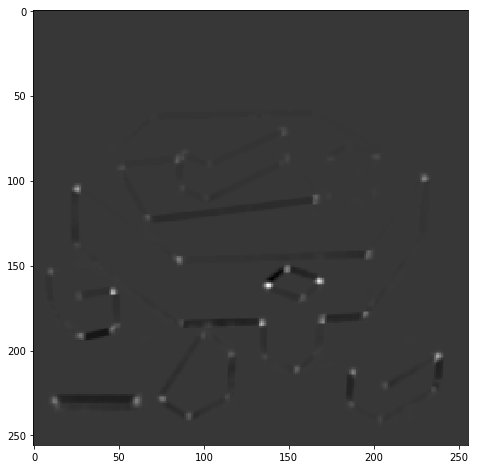

In [3]:
img_cornerness = cv2.cornerHarris(img, blockSize=5, ksize=3, k=0.03)

plt.figure(figsize=[8,8])
plt.imshow(img_cornerness, 'gray')


### We can detect peaks in the image above, or just use another OpvenCV function

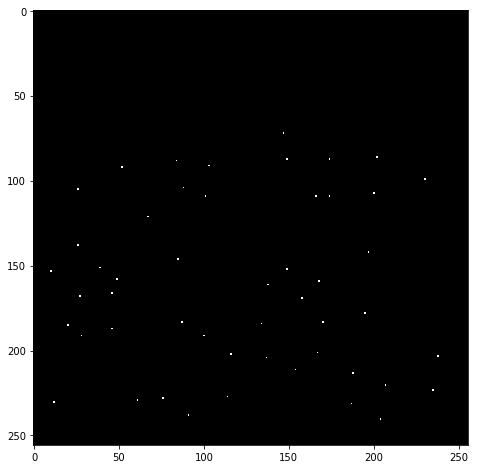

In [4]:
corners = cv2.goodFeaturesToTrack(img, maxCorners=50, qualityLevel=0.01, 
                                  minDistance=8, blockSize=5, useHarrisDetector=True, k=0.03)
corners = [point[0] for point in corners]
corners = np.array(corners, dtype=int)

img_corners = np.zeros_like(img, dtype=np.uint8)
img_corners[corners[:,1], corners[:,0]] = 255

plt.figure(figsize=[8,8])
plt.imshow(img_corners, 'gray')

### Add red marks to image

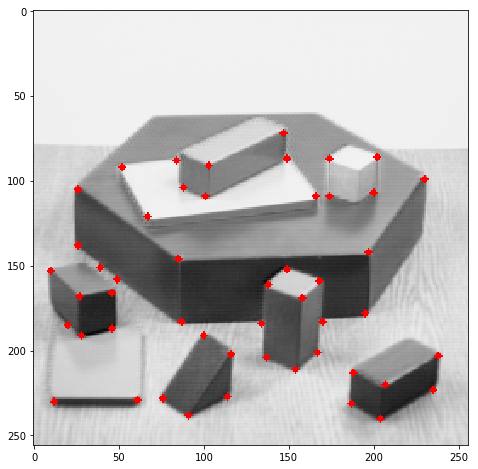

In [5]:
img_corners_rgb = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
img_corners_rgb[:,:,0] = img_corners_rgb[:,:,1] = img_corners_rgb[:,:,2] = img

ind = np.nonzero(ndi.binary_dilation(img_corners, iterations=2))
img_corners_rgb[ind[0], ind[1],0] = 255
img_corners_rgb[ind[0], ind[1], 1] = img_corners_rgb[ind[0], ind[1], 2] = 0

plt.figure(figsize=[8,8])
plt.imshow(img_corners_rgb)